 # PROYECTO ANALISIS DE DATOS PARA ZUBER
 
Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago necesita que encuentre patrones en la información disponible para comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

## Paso cuatro: Análisis exploratorio de datos (Python) ##

Para este apartado del proyecto trabajaremos con dos CSV:

*1. /datasets/project_sql_result_01.csv, que contiene los siguientes datos:*

    - company_name: nombre de la empresa de taxis

    - trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.  

*2. /datasets/project_sql_result_04.csv. contiene los siguientes datos:*

    - dropoff_location_name: barrios de Chicago donde finalizaron los viajes

    - average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Realizaré un analisis exploratorio de datos y posteriormente una prueba de hipótesis que nos ayudará a esclarecer si "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

### Importar los archivos y estudiar los datos que contienen ###

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as stats


In [45]:
taxis= pd.read_csv("/datasets/project_sql_result_01.csv")
taxis.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [46]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [47]:
dropoff_info= pd.read_csv("/datasets/project_sql_result_04.csv")
dropoff_info.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [48]:
dropoff_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Revisión de los tipos de datos

De la revisión de la información obtenida anteriormente se observa que los tipos de datos son correctos, nuestro primer Dataframde contiene la columna "company_name", esta es una columna de texto (nombres de empresas de taxis), por lo que el tipo de datos object esta bien, respecto a la columna "trips_amount" podemos ver que contiene cantidades de viajes, que son valores enteros; así que el tipo de datos int64 es apropiado. 
En cuanto a nuestro DataFrame dropoff_info he podido concluir que tampoco existe ningun inconveniente con los tipos de datos ya que "dropoff_location_name" contiene nombres de ubicaciones de descenso, lo cual son valores de texto por lo que el tipo de datos object es correcto, asi mismo; respecto a "average_trips" podemos dilucidar que son valores numéricos con decimales y por lo tanto el tipo de dato float64 es apropiado, siendo así no debemos realizar ninguna modificación en este sentido.

### Verificación de valores duplicados

In [49]:
dropoff_info.duplicated().sum()

0

In [50]:
taxis.duplicated().sum()

0

### Identificar los 10 principales barrios en términos de finalización del recorrido

In [51]:
# Para lograrlo ordenaré el DataFrame por la columna 'average_trips' en orden descendente
top_10_neighborhoods = dropoff_info.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los 10 principales barrios
print(top_10_neighborhoods)


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones, sacar conclusiones basadas en cada gráfico y explicar los resultados

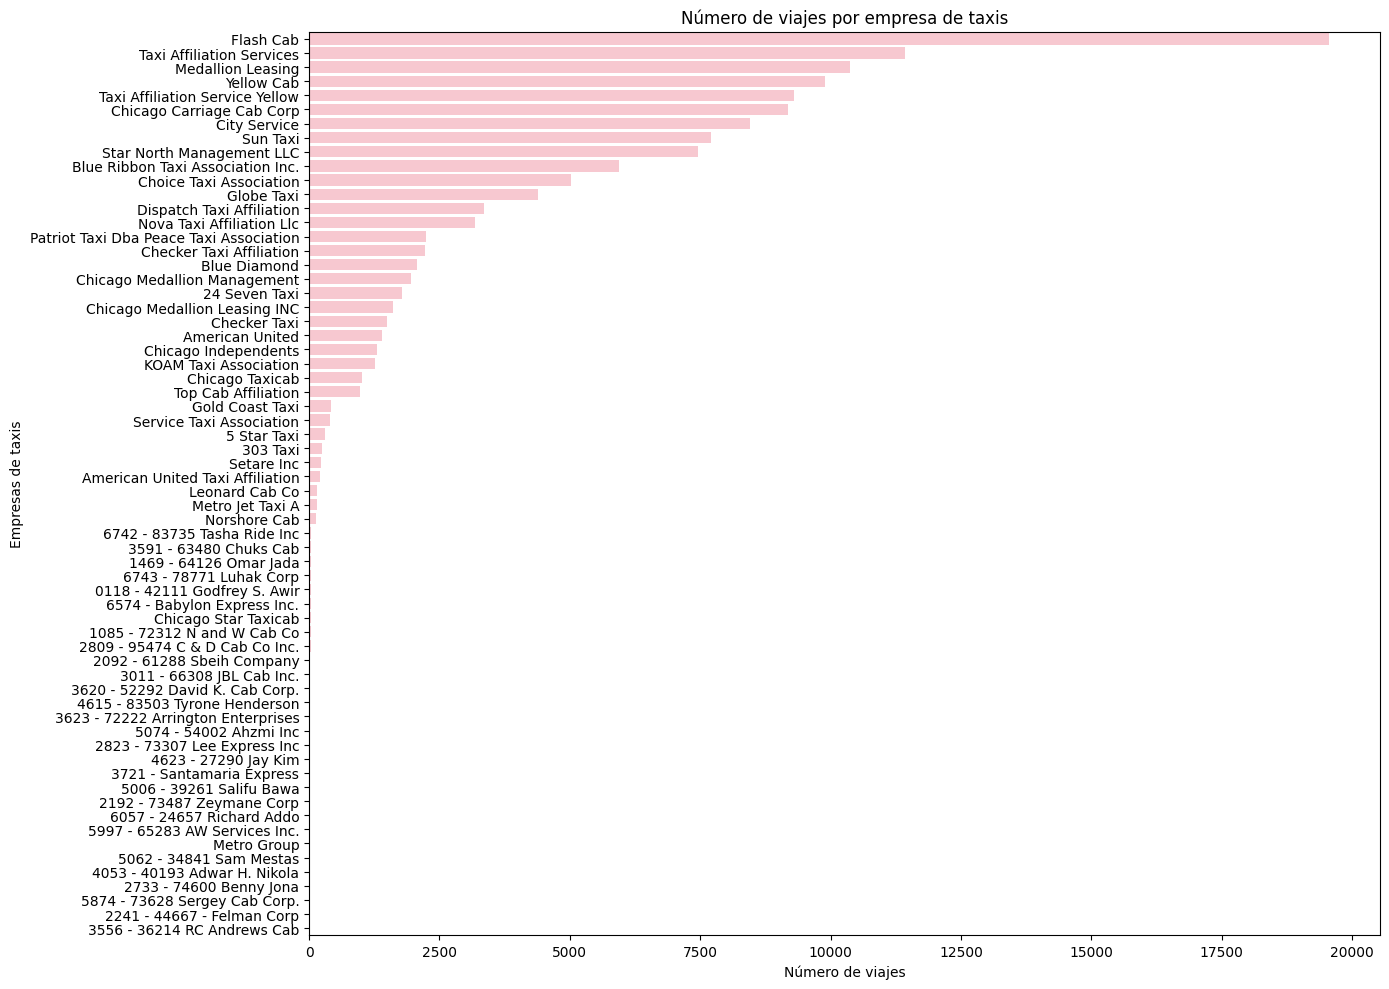

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [52]:
plt.figure(figsize=(14, 10))
sns.barplot(data=taxis, x='trips_amount', y='company_name', color='pink')
plt.title('Número de viajes por empresa de taxis')
plt.xlabel('Número de viajes')
plt.ylabel('Empresas de taxis')
plt.tight_layout()  # Con esto ajustamos el espaciado de la figura automáticamente
plt.show()

# Seleccionamos los 10 primeros
top_10_taxis = taxis.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_taxis)

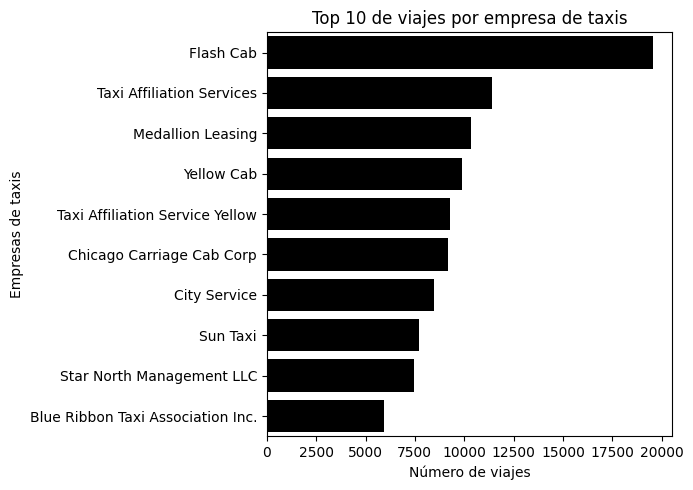

In [53]:
top_10_taxis = taxis.sort_values(by='trips_amount', ascending=False).head(10)

# Gráfico solo para los top 10
plt.figure(figsize=(7, 5))
sns.barplot(data=top_10_taxis, x='trips_amount', y='company_name', color='black')
plt.title('Top 10 de viajes por empresa de taxis')
plt.xlabel('Número de viajes')
plt.ylabel('Empresas de taxis')
plt.tight_layout()  # Con esto ajustamos el espaciado de la figura automáticamente
plt.show()

Gracias a nuestra gráfica podemos ver claramente cual es la competencia mayor en cuanto al exito de sus viajes ya que poseen una mayor cantidad de ellos, en primer lugar tenemos a Flash Cab, la cual resalta bastante de las otras, esto puede servirnos para estudiar a la competencia a fin de implementar en Zuber politicas y estrategias para que le vaya bien en el negocio que están implementando, posteriormente tenemos varias empresas que tambien tienen exito entre ellas:  Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, Blue Ribbon Taxi Association Inc., entre otros que continuan descendiendo en su numero como podemos ver en la gráfica. Luego y al final de la misma, vemos que hay empresas de taxis que han desaparecido practicamente pues sus numeros estan en cero, lo que nos puede ayudar también a estudiar su fracaso e implementar estrategias que prevenir dichos resultados.

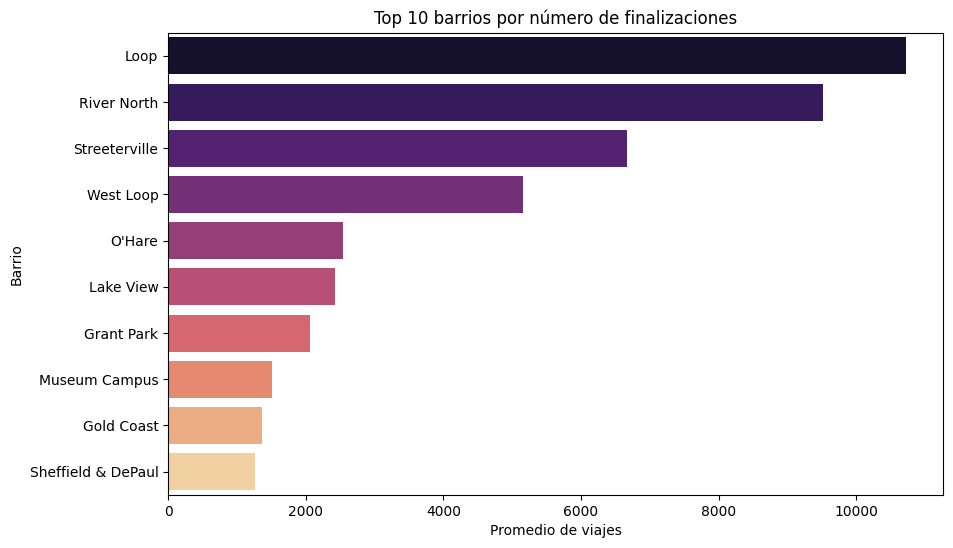

In [54]:
# Gráficamos los 10 barrios del top
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='magma')
plt.title('Top 10 barrios por número de finalizaciones')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.show()

Respecto a esta gráfico dentro del contexto del negocio que queremos mejorar es muy importante tomar en cuenta los barrios donde mas viajes se realizan, ya que son los clientes potenciales a los queremos llegar y donde podriamos enfocarnos debido a la alta demanda que existe. Tenemos como primero de ellos al Loop con más 10727.466667 viajes, seguido por River North (9523.666667), Streeterville (6664.666667), West Loop (5163.666667), O'Hare (2546.900000), Lake View (2420.966667), Grant Park (2068.533333), Museum Campus (1510.000000), Gold Coast (1364.233333) y finalmente en el puesto 10: Sheffield & DePaul (1259.766667).

## Paso cinco: Prueba de hipótesis (Python)


Para este apartado del proyecto trabajaremos con /datasets/project_sql_result_07.csv, este dataframe contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare y contiene los siguientes datos:

    - start_ts: fecha y hora de recogida.

    - weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje.
    
    - duration_seconds: duración del viaje en segundos.
    
En primer lugar cargaremos los datos a fin de revisar la inforación y trabajar con ella.

In [55]:
for_hypothesis = pd.read_csv("/datasets/project_sql_result_07.csv")
for_hypothesis.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [56]:
for_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


De la información obtenida podemos verificar que no existen valores nulos.

In [57]:
for_hypothesis.duplicated().sum()

197

Sin embargo, existen filas completamente duplicadas dentro de este dataset, esto deberemos gestionarlos a continuación:

In [60]:
for_hypothesis = for_hypothesis.drop_duplicates()
numero_duplicados_despues = for_hypothesis.duplicated().sum()
print(f"Total de filas duplicadas después de eliminar duplicados: {numero_duplicados_despues}")

Total de filas duplicadas después de eliminar duplicados: 0


Con esto hemos eliminado las filas completamente duplicadas, adicionalmente, de la información obtenida he podido notar que el tipo de dato para la columna "start_ts" es incorrecto, ya que esta es una columna que contiene datos de fecha y hora y por lo tanto, lo apropiado es modificar este tipo de dato a formato datatime.

In [62]:
# Cambiamos el tipo de dato
for_hypothesis['start_ts'] = pd.to_datetime(for_hypothesis['start_ts'])

# Ahora 'start_ts' debería ser de tipo datetime64
print(for_hypothesis.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB
None


### Prueba de hipótesis: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [66]:
# Filtramos los datos para obtener solo los sábados
for_hypothesis['day_of_week'] = for_hypothesis['start_ts'].dt.day_name()
saturdays = for_hypothesis[for_hypothesis['day_of_week'] == 'Saturday']

# Filtramos los datos para obtener sábados lluviosos y sábados no lluviosos
saturdays_rainy = saturdays[saturdays['weather_conditions'].str.contains('Bad', case=False)]
saturdays_not_rainy = saturdays[~saturdays['weather_conditions'].str.contains('Bad', case=False)]

# Obtenemos las duraciones de los viajes
durations_rainy = saturdays_rainy['duration_seconds']
durations_not_rainy = saturdays_not_rainy['duration_seconds']

# Realizo la prueba de Levene para comprobar la igualdad de varianzas
levene_stat, levene_p_value = stats.levene(durations_rainy, durations_not_rainy)

# Nivel de significancia para la prueba de Levene que se ha indicado
alpha_levene = 0.05

print(f"Levene's test statistic: {levene_stat}")
print(f"Levene's test p-value: {levene_p_value}")

if levene_p_value > alpha_levene:
    equal_var = True
    print("No rechazamos la hipótesis nula de Levene. Las varianzas son iguales.")
else:
    equal_var = False
    print("Rechazamos la hipótesis nula de Levene. Las varianzas no son iguales.")

# Ahora realizo la prueba t para dos muestras independientes considerando el resultado de Levene
t_stat, p_value = stats.ttest_ind(durations_rainy, durations_not_rainy, equal_var=equal_var)

# Nivel de significancia para la prueba t
alpha_t_test = 0.05

# Resultados de la prueba t
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha_t_test:
    print("Rechazamos la hipótesis nula. La duración promedio de los viajes sí cambia los sábados lluviosos.")
else:
    print("No rechazamos la hipótesis nula.")

Levene's test statistic: 0.000586951625283602
Levene's test p-value: 0.9806770360671218
No rechazamos la hipótesis nula de Levene. Las varianzas son iguales.
T-statistic: 5.427957689754561
P-value: 7.397770692813658e-08
Rechazamos la hipótesis nula. La duración promedio de los viajes sí cambia los sábados lluviosos.


Escogí esta forma de realizar la prueba de hipotesis debido a lo siguiente:

Usé la prueba t ya que considero que es adecuada para comparar las medias de dos grupos independientes. En este caso, al clasificar los sábados entre lluviosos y no lluviosos se tienen muestras separadas y asi puedo comprobar la hipotesis de si existe una diferencia entre ellos. 

Mi Hipótesis Nula (H0): Era que no hay diferencia significativa entre ambas muestras.


Mi Hipótesis Alternativa (H1): Que si hay una diferencia significativa en la duración promedio de los viajes entre sábados lluviosos y sábados no lluviosos.

In [19]:
# Ejercicio adicional para probar un punto

# Calculamos la duración promedio de los viajes por condición meteorológica
average_duration = for_hypothesis.groupby('weather_conditions')['duration_seconds'].mean().reset_index()

# Renombramos para mayor claridad
average_duration.columns = ['weather_conditions', 'average_duration']

print(average_duration)

# Comparamos las duraciones promedio de los viajes
bad_weather_duration = average_duration[average_duration['weather_conditions'] == 'Bad']['average_duration'].values[0]
good_weather_duration = average_duration[average_duration['weather_conditions'] == 'Good']['average_duration'].values[0]

if bad_weather_duration > good_weather_duration:
    print("La duración promedio de los viajes es mayor en días con mal clima.")
else:
    print("La duración promedio de los viajes es mayor en días con buen clima.")




  weather_conditions  average_duration
0                Bad       2427.205556
1               Good       1999.675676
La duración promedio de los viajes es mayor en días con mal clima.


Como podemos ver al realizar este analisis, se puede concluir que cuando existe mejor clima los viajes suelen incrementar y esto a su vez se traduce a que como demora mucho menos el tiempo de recorrido se tiene la posibilidad de realizar mas carreras y por ende se puede ganar más esos días, lo que hay mejor clima.

## Conclusiones 

Dentro de este apartado hemos podido ver el impacto que tiene el clima en la frecuencia de los viajes, esto tiene mucha lógica pues en días lluviosos los recurridos tienden a durar más y puede deberse a la dificultad de conducir bajo esas condiciones, además del tráfico que se puede generar, la prueba de hipótesis que realizamos nos ayudó a demostrar que si existe una diferencia en los días sabados lluviosos en cuanto a la duración de los recorridos. Además nos familiarizamos con los barrios más populares en cuanto a terminos de finalización de recorrido, conocimos a la competencia y el número de viajes que realizan, toda esta información es muy importante para nuestro objetivo futuro en la empresa Zuber.
Otra acotación importante es que gracias a nuestras anteriores consultas en SQL se nos ha facilitado mucha información contenida en los datasets para realizar estos analisis de manera diligente.